## Observations and Insights

1.Ramicane and Capomulin were the most successful drugs in reducing tumor growth
2.There is a positive correlation between average tumor volume and mouse weight
3.There is no notable difference in tumor growth in male and female mice

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=combined_data['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] !="g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
#unique_mouse_count=remove_duplicate_mice['Mouse ID'].nunique()
#unique_mouse_count

clean_mouse_count=clean_data['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]]
group_by_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": group_by_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": group_by_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": group_by_data["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": group_by_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": group_by_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": group_by_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})
summary_df.head()



,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df.head()
# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby('Drug Regimen').aggregate(['min', np.median, max])
#df.groupby('key').aggregate(['min', np.median, max])

Age_months            Weight (g)            Timepoint             \
                    min median max        min median max       min median max   
Drug Regimen                                                                    
Capomulin             1   16.5  24         15   20.5  25         0     20  45   
Ceftamin              2   12.0  24         25   28.0  30         0     20  45   
Infubinol             1   20.0  24         23   27.0  30         0     15  45   
Ketapril              1   18.0  24         25   28.0  30         0     20  45   
Naftisol              2    9.0  23         25   27.0  30         0     20  45   
Placebo               1   10.0  21         25   28.0  30         0     15  45   
Propriva              1    7.5  24         25   26.0  30         0     15  45   
Ramicane              1    9.0  23         16   19.0  25         0     20  45   
Stelasyn              1   14.0  23         25   28.0  30         0     20  45   
Zoniferol             2   12.5  24         25   28.0  30         0     15  45   

             Tumor Volume (mm3)                       Metastatic Sites         \
                            min     median        max              min median   
Drug Regimen                                                                    
Capomulin             23.343598  41.557809  48.158209                0      0   
Ceftamin              45.000000  51.776157  68.923185                0      1   
Infubinol             36.321346  51.820584  72.226731                0      1   
Ketapril              45.000000  53.698743  78.567014                0      1   
Naftisol              45.000000  52.509285  76.668817                0      1   
Placebo               45.000000  52.288934  73.212939                0      1   
Propriva              45.000000  50.446266  72.455421                0      1   
Ramicane              22.050126  40.673236  47.622816                0      0   
Stelasyn              45.000000  52.431737  75.123690                0      1   
Zoniferol             45.000000  51.818479  73.324432                0      1   

                  
             max  
Drug Regimen      
Capomulin      3  
Ceftamin       4  
Infubinol      4  
Ketapril       4  
Naftisol       4  
Placebo        4  
Propriva       4  
Ramicane       3  
Stelasyn       4  
Zoniferol      4

## Bar and Pie Charts

Text(0.5, 1.0, 'Data Points Per Drug Treatment Regimen')

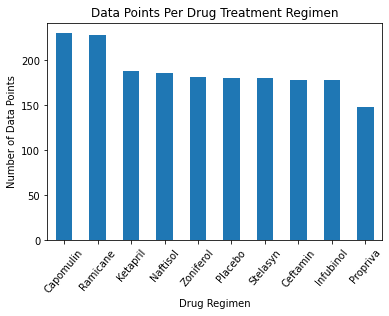

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapts2 = clean_data.groupby("Drug Regimen").count()['Tumor Volume (mm3)']
forpanbar = pd.DataFrame(datapts2)

also = forpanbar.sort_values(by='Tumor Volume (mm3)',ascending=False).plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")


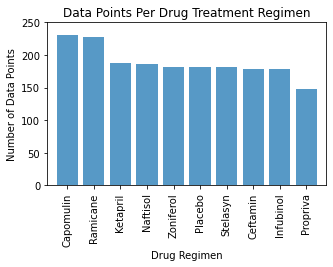

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(datapts2))

tick_locations = [x for x in x_axis]
#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(5,3))


newtry = forpanbar.reset_index()
newsort=newtry.sort_values('Tumor Volume (mm3)',ascending=False)

plt.bar(x_axis, newsort['Tumor Volume (mm3)'],alpha=0.75, align="center")
plt.xticks(tick_locations, newsort['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(datapts2)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()


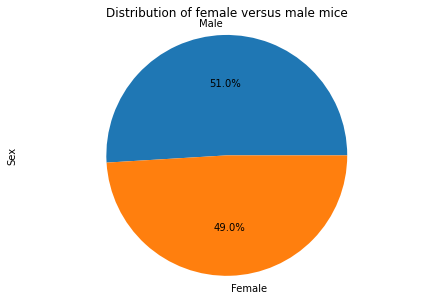

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = clean_data["Sex"].value_counts()
plt.figure()
mice_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()


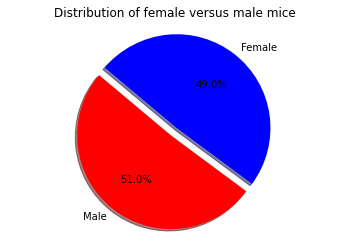

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_count.values, explode=explode, labels=mice_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") | 
                          (clean_data["Drug Regimen"] == "Ramicane") | 
                          (clean_data["Drug Regimen"] == "Infubinol") | 
                          (clean_data["Drug Regimen"] == "Ceftamin")]

regimen_data = regimen_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimen_data = regimen_data.groupby(["Mouse ID", "Drug Regimen"])
regimen_df = regimen_data["Tumor Volume (mm3)"].sum().to_frame()
regimen_plot = regimen_df["Tumor Volume (mm3)"]
regimen_df.head()

# quartile calculations
quartiles = regimen_plot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_df = clean_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Capomulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# Ramicane

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
# Infubinol 
# Determine outliers using upper and lower bounds

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


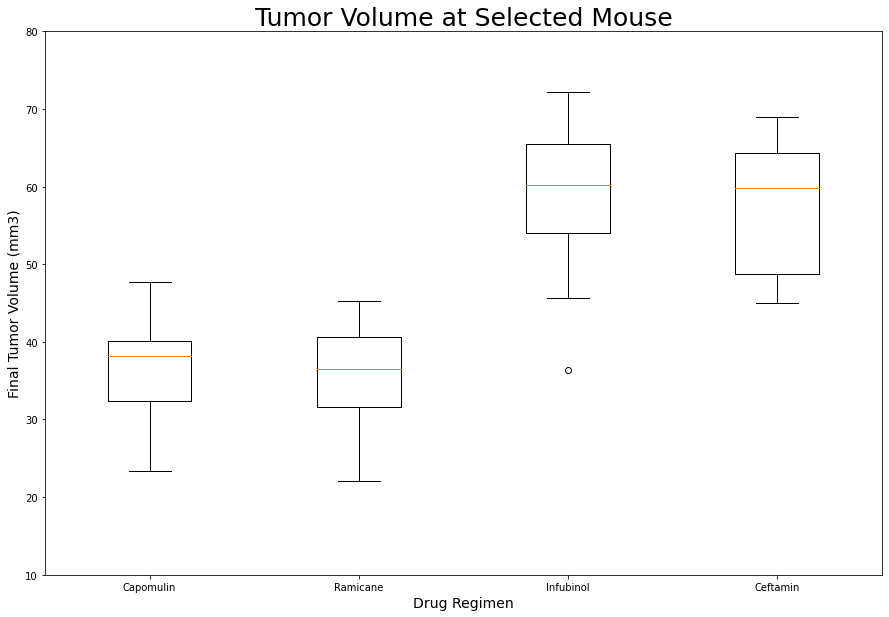

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

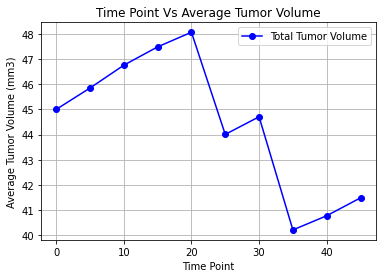

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
tumor_data_df = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
tumor_index_df = tumor_data_df.unstack(0)
tumor_plot_df = tumor_index_df["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumor_total, = plt.plot(xAxis, tumor_plot_df["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumor_total], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = clean_data[(combined_data["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
group_by_data = scatter_data.groupby(["Mouse ID","Weight (g)"])
scatter_data_df = group_by_data["Tumor Volume (mm3)"].mean().to_frame()
scatter_data_df = scatter_data_df.reset_index()
scatter_data_df.head()

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<Figure size 432x288 with 0 Axes>

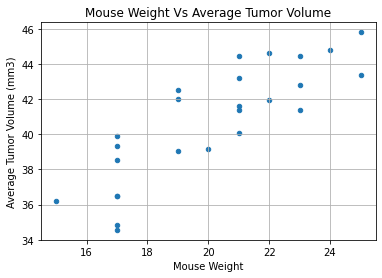

In [26]:
#Plot
plt.figure()
scatter_data_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

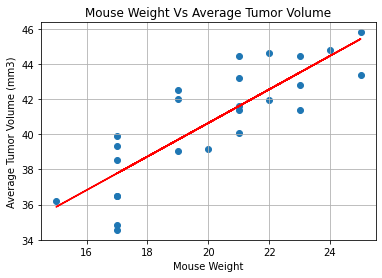

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_data_df["Weight (g)"]
y_values = scatter_data_df["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()